In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# Statistics Exercise
## Statistical Distributions. Properties of distributions. Applications of Probability and Statistics in Computer Science

### Problem 1. Plotting a Single Distribution. Digits in $\pi$ and $e$
We expect that the decimal digits in $\pi$ and $e$ will be randomly distributed and there's no reason for any digit to dominate over others. Let's verify this.

Using an algorithm, the first 10 004 digits of $\pi$ and $e$ were generated:
$$
\pi = 3.(141592 \dots 5678)5667
$$
$$
e = 2.(718281 \dots 6788)5674
$$

The 10 000 digits in brackets were counted. You can see the results in `digits.dat`. Each column corresponds to one digit from 0 to 9. The first row is for $\pi$ and the second row is for $e$.

How are these digits distributed? Are the two distributions different?

**Note:** The dataset is **not properly formatted** to work easily. You can transpose it. Now, digit counts will be in rows and variables - in columns. 
```python
digits = pd.read_table("digits.dat", header = None).T
```

You can also specify column names like this:
```python
digits.columns = ["pi", "e"]
```

Also note that **we are not creating the histogram of the distribution**. We already have the counts, we need to plot them. In a sense, the histogram has already been calculated.

To do this, we can create a "bar chart" (using `plt.bar()`). We have to provide values for the x-axis and y-axis. For the x-axis, we have the numbers 0 through 9 (we can use the *index* of the dataset like this: `digits.index`). For the y-axis, we need to plot the digit counts directly.

We can see that even the simplest datasets sometimes need a bit of preprocessing. This is always the case when we're working with data.

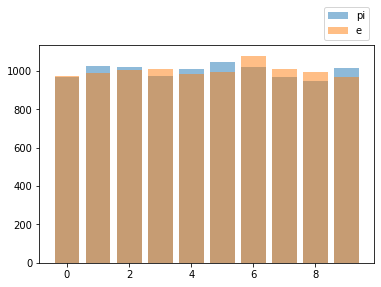

In [3]:
digits = pd.read_table('data/digits.dat', header = None).T
digits.columns = ['pi', 'e']
plt.bar(digits.index, digits['pi'], alpha = 0.5, label = 'pi')
plt.bar(digits.index, digits['e'], alpha = 0.5, label = 'e')
plt.legend(bbox_to_anchor = (1, 1.2))
plt.show()

Let's try something else. Scientists have measured the percentage of silica ($\text{SiO}_2$, sand / glass) for 22 meteors. You can find it in `silica.dat`. How are these distributed? What is a "typical" percentage? Is there such percentage at all?

Print the mean, standard deviation (you can use the biased or unbiased formula), skewness and kurtosis of the distribution. What do these numbers tell you? How do they relateto the shape of the distribution? Can you characterize the distribution better? (An idea would be to characterize different parts of it on their own, as if they're different distributions.)

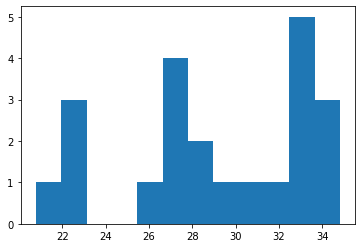

Mean: 29.165000000000006
Standart deviation (std): 4.29153513436903
Skewness: -0.44644211385029625
Kurtosis: -0.9242970726953743


In [4]:
silica = pd.read_table('data/silica.dat', header = None)[0]
plt.hist(silica, bins = 12)
plt.show()
print('Mean: ' + str(silica.mean()))
print('Standart deviation (std): ' + str(silica.std()))
print('Skewness: ' + str(silica.skew()))
print('Kurtosis: ' + str(silica.kurtosis()))

### Problem 2. Categorical Variables. Comparing Categories
In addition to numeric variables (like age and salary), in statistics we also use **categorical variables**. These are descriptions of quality (as opposed to quantity). Such variables can be gender, smoker / non-smoker, results of a medical study (healthy / not healthy), colors (red, green, blue), etc. To plot values of categories, we use *bar charts*. Since category names can be long, it's sometimes useful to plot the lines horizontally.

**There is a very significant difference between histograms and bar charts. Histograms are used to plot the frequency distribution of one numeric variable. Bar charts are used to plot categorical variables - how each value compares to other values.**

The dataset `budget.dat` contains the figures for the eight main items in the US budget for 1978 and 1979 in billions
of dollars.

Display the two budgets separately. Use `xlabel()` (or `ylabel()` if your plot is horizontal) to write the names of each category. You can use [this](https://matplotlib.org/examples/pylab_examples/barchart_demo.html) and [this](https://matplotlib.org/examples/pylab_examples/barchart_demo2.html) examples as a guide.

Create another variable which shows the difference in budget $\Delta b = b_{1979} - b_{1978}$. Add this variable to the dataset (find out how). Plot it. How does the budget differ?

Since the numbers are different, a better comparison will be if we convert them to percentages of the total budget. Create two more variables for 1978 and 1979 and add them to the dataset. Plot these now. Also plot the difference in percentage, like you did before.

In [5]:
us_budget = pd.read_table('data/budget.dat', index_col = 'Category')
    
def plot_budget(title, budget_array):
    plt.title(title)
    plt.barh(range(len(us_budget)), budget_array)
    plt.yticks(range(len(us_budget)), us_budget.index) # Replace the y ticks with the category names 
    plt.xlabel('Money (billions $)')
    plt.show()
    
def plot_budget_comparison(title, us_budget_1978, us_budget_1979, opacity = 0.5, x_label = 'Money (billions $)'):
    plt.title(title)
    plt.barh(range(len(us_budget)), us_budget_1978, alpha = opacity, label = '1978')
    plt.barh(range(len(us_budget)), us_budget_1979, alpha = opacity, label = '1979')
    plt.yticks(range(len(us_budget)), us_budget.index) # Replace the y ticks with the category names
    plt.xlabel(x_label)
    plt.legend(bbox_to_anchor = (1.25, 1))
    plt.show()

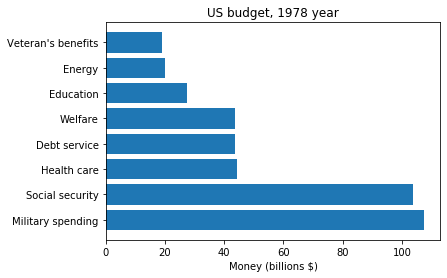

In [6]:
us_budget_1978 = us_budget['1978']
plot_budget('US budget, 1978 year', us_budget_1978)

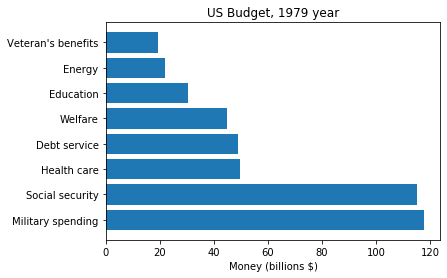

In [7]:
us_budget_1979 = us_budget['1979']
plot_budget('US Budget, 1979 year', us_budget_1979)

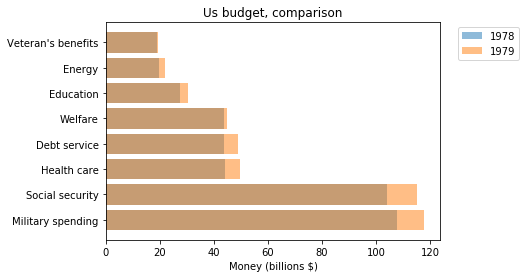

In [8]:
plot_budget_comparison('Us budget, comparison', us_budget_1978, us_budget_1979)

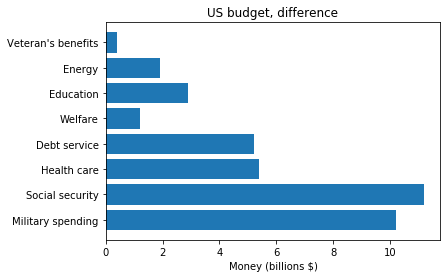

In [9]:
us_budget['difference'] = us_budget_1979 - us_budget_1978
plot_budget('US budget, difference', us_budget['difference'])

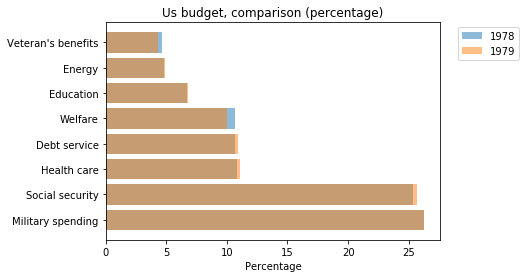

In [10]:
us_budget_sums = us_budget.sum()
us_budget['1978 percentage'] = us_budget_1978 / us_budget_sums['1978'] * 100
us_budget['1979 percentage'] = us_budget_1979 / us_budget_sums['1979'] * 100
plot_budget_comparison(
    'Us budget, comparison (percentage)',
    us_budget['1978 percentage'],
    us_budget['1979 percentage'],
    0.5,
    'Percentage')

### Problem 3. Correlations between Variables. Alcohol and Tobacco Usage
The dataset `alcohol_tobacco.dat` shows the average weekly household spending, in British pounds, on tobacco products and alcoholic beverages for each of the 11 regions of Great Britain.

Create a scatter plot. Print the correlation coefficient. You can use the **correlation matrix** (find out how).

There's a major outlier. Which one is it?

Remove the outlier from the dataset (find out how). Calculate the correlation coefficient once again. It should be much higher.

This example is useful to show what an outlier is, and how an outlier can influence the results of an experiment.

**Note:** Be careful with outliers. Sometimes they indicate human error (e.g. human height 1588 cm is obviously wrong) but sometimes they indicate important patterns in the data. Should you remove, replace, or leave them is a difficult question and should be answered separately for each dataset.

In [11]:
alcohol_tobacco = pd.read_table('data/alcohol_tobacco.dat')
def plot_alcohol_tobacco(data):
    plt.scatter(data.Alcohol, data.Tobacco)
    plt.xlabel('Alcohol')
    plt.ylabel('Tobacco')
    plt.show()
    print(data.corr()) # Show the correlation matrix

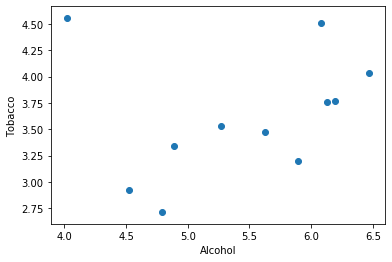

          Alcohol   Tobacco
Alcohol  1.000000  0.223572
Tobacco  0.223572  1.000000


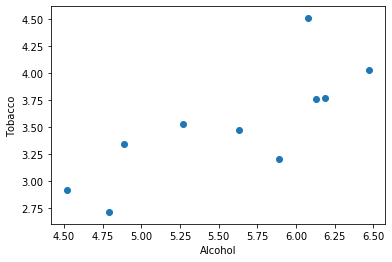

          Alcohol   Tobacco
Alcohol  1.000000  0.784287
Tobacco  0.784287  1.000000


In [12]:
plot_alcohol_tobacco(alcohol_tobacco)
alcohol_tobacco_filtered = alcohol_tobacco.where(alcohol_tobacco.Region != 'Northern Ireland').dropna()
plot_alcohol_tobacco(alcohol_tobacco_filtered)

### Problem 4. Simulation
Another prediction technique based on statistics, is simulation. This means recreating a system's parameters and running the experiment on a computer instead of running it in real life. Simulation can give us many insights. It's useful for prediction, "what-if" analysis, etc. It's also very useful if we have very limited "real experimentation" resources and want to narrow down our possibilities.

Let's see how we can simulate the profit of a grocery shop.

The profit is dependent on the customers and what items they buy. Let's assume that the number of customers per months follows a normal distribution with mean 500 and standard deviation 20.

$$ C \sim N(500, 20) $$

In the shop, there are several items, each having a different popularity. The popularity represents the probability of buying each item.

| Item               | Price | Popularity |
|--------------------|-------|------------|
| Bread              | 0.99  | 0.5        |
| Milk               | 2.89  | 0.15       |
| Eggs, dozen        | 2.00  | 0.2        |
| Chicken fillet, kg | 6.39  | 0.15       |

Each customer buys *exactly one* article at random. Each customer will generate an expected profit equal to $\text{price} . \text{popularity}$. Total profit: sum of all profits.

In [13]:
def get_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return 0.99
    elif n < 0.65:
        return 2.89
    elif n <= 0.85:
        return 2
    else:
        return 6.39

In [14]:
days = 1000
def run_simulation():
    profits = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_customer_profit() for c in np.arange(customers)])
        profits.append(profit)
    return profits

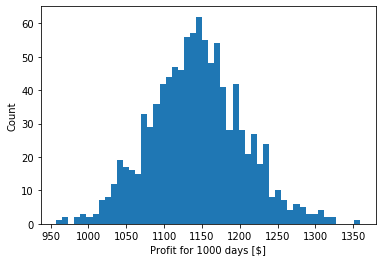

In [15]:
profits = run_simulation()
plt.hist(profits, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

Now we can answer questions like:
* What's the probability of profit less than \$1100? 
* What's the probability of profit between \\$1300 and \\$1400?

We can also change our model. Let's suppose now that one customer can take 1, 2 or 3 items, with probabilities 0.5, 0.3 and 0.2 respectively. The picked items are independent. How does this change the distribution?

In [16]:
def get_customer_profit_many_items(items = 1):
    customer_sum = sum([get_customer_profit() for i in range(items)])
    return customer_sum

def get_total_customer_profit():
    n = np.random.random()
    if n <= 0.5:
        return get_customer_profit_many_items(1)
    elif n <= 0.8:
        return get_customer_profit_many_items(2)
    else:
        return get_customer_profit_many_items(3)

In [17]:
days = 1000
def run_simulation_many_items():
    days = 1000
    profits_many_items = []
    for day in range(days):
        customers = np.floor(np.random.normal(500, 20))
        profit = sum([get_total_customer_profit() for c in np.arange(customers)])
        profits_many_items.append(profit)
    return profits_many_items

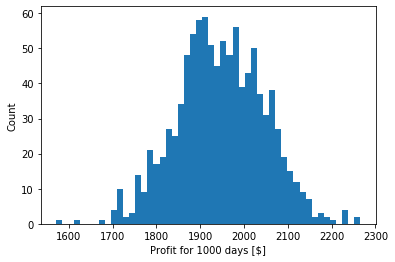

In [18]:
profits_many_items = run_simulation_many_items()
plt.hist(profits_many_items, bins = 50)
plt.xlabel("Profit for " + str(days) + " days [$]")
plt.ylabel("Count")
plt.show()

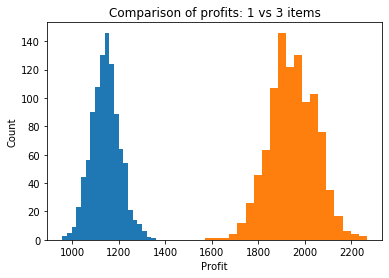

In [19]:
plt.title("Comparison of profits: 1 vs 3 items")
plt.hist(profits, bins = 20)
plt.hist(profits_many_items, bins = 20)
plt.xlabel("Profit")
plt.ylabel("Count")
plt.show()

### ** Problem 5. Monte Carlo Simulation
One common technique to apply simulations is called **Monte Carlo simulation**. It's similar to the simulation from the previous example. The main idea is to use random sampling to solve deterministic problems.

Research what these simulations are. Give examples. Implement at least one case of a Monte Carlo simulation. You can use the following checklist to help with your research and work:
* What is a simulation?
    * How is simulation used in science?
    * Why is a simulation useful?
* How are statistics useful in simulation? How can we simulate unknown, random processes?
* What is a Monte Carlo simulation (also known as "Monte Carlo method")?
* A common use of Monte Carlo methods is numeric integration
    * Define the problem. Propose the solution. Implement it and test with some common functions
    * How does this method compare to other methods, e.g. the trapezoidal rule? Compare the performance (accuracy and time to execute) of both methods
* Apply Monte Carlo simulation to a real-life system. There are many examples. You can see [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method#Applications) or some other resource for inspiration.

### ** Problem 6. Probabilistic Data Structures
A very interesting application of probability in computer science is a kind of data structures which have a probabilistic behaviour. Examples of these are **Bloom filter**, **Skip list**, **Count-min sketch** and **HyperLogLog**.

Research how one of these structures works. Or write about many of them, if you wish. You can use the following checklist as a guide:
* What is a data structure? 
* What is a probabilistic data structure?
    * Where does the probabilistic behaviour emerge?
    * What advantages do these structures provide?
* For your chosen structure, how is it constructed?
    * What parts do you need? What are the details?
* How does the structure work?
    * What operations can you do?
    * What are the typical probabilities associated with these operations?
* Analyze the structure
    * Analyze the runtimes for all operations
    * Analyze the space usage
    * Compare to a similar, non-probabilistic data structure
    * What advantages does the new data structure have? What drawbacks do you need to be aware of?
* Give at least one example where this structure is useful
    * E.g. Bloom filter - spell checkers
    * Analyze the use case
    * If possible, implement the use case
    * Display some metrics (e.g. % conserved space, % reduced time)

## Old Exercises

### 1. Linear Regression, Part 3. Putting It All Together

We can now see the entire picture. We started with data points $(x; y)$. Those were related:$$ y = ax + b + \varepsilon $$

We needed to find "the best" line which describes the points (and "disregards" the random errors). We knew that the best line should lie as close as possible to all points.

We model the data with a line with unknown coefficients: $\hat{y} = \hat{a}x + \hat{b}$.

We defined the distance between a point $(x, y)$ and the line through $(x, \hat{y})$ as $d = (y-\hat{y})^2$. Using this, we defined the total distance as the sum of all distances (normalized over all points):$$ J = \frac{1}{N}\sum(y_i-\hat{y}_i)^2 = \frac{1}{N}\sum\left(y_i-(\hat{a}x + \hat{b})\right)^2 $$

This is our **loss function**. The best line will **minimize** this distance.

To minimize the distance, we could use **gradient descent**. This method finds the parameters which correspond to the best line. After that, we're ready. We have now modelled the original data with our line.

In [20]:
def generate_noisy_linear_data(a, b):
    """
    Generates a noisy sequence y = ax + b + epsilon
    """
    x = np.linspace(-4, 4, 10)
    y = a * x + b
    y_error = np.random.randn(len(x))
    y += y_error
    return (x, y)

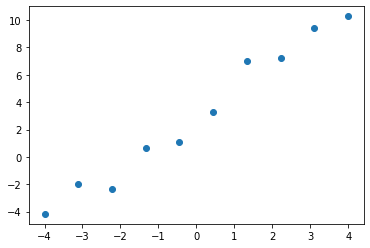

In [21]:
data_x, data_y = generate_noisy_linear_data(2, 3) # y = 2x + 3
plt.scatter(data_x, data_y)
plt.show()

In [22]:
def calculate_loss(x, y, a, b):
    """
    Calculates the loss function for linear regression. 
    Accepts the original data points (x, y), and the parameters of the line (a, b).
    """
    y_predicted = a * x + b
    distances = (y - y_predicted) ** 2
    return np.sum(distances) / len(x)

In [23]:
# Testing the loss function with several values of a and b
for model_a, model_b in [(2, 3), (2, 2.5), (2, 10), (-5, 3)]:
    print(
        "Loss function at a = " + str(model_a) + ", b = " + str(model_b) + ":", 
        calculate_loss(data_x, data_y, model_a, model_b))

Loss function at a = 2, b = 3: 0.6912523301266289
Loss function at a = 2, b = 2.5: 0.9895246254388862
Loss function at a = 2, b = 10: 49.015440195755026
Loss function at a = -5, b = 3: 311.0755903482704


To implement gradient descent, we need to calculate the partial derivatives of the loss function with respect to $a$ and $b$. We can do this numerically (using a function for numerical differentiation). However, numerical differentiation can be problematic. Also, it's always possible to calculate a derivative of a "well-behaved function" analytically. That's why we'd better calculate the derivatives by hand first and input the formulas directly.

If you don't want to do this, here are the formulas for the derivatives. Note that they are all scaled by the number of points, like the error function:

$$ \frac{\partial J}{\partial a} = -\frac{2}{N} \sum x_i\left(y_i - \hat{y}\right) $$

$$ \frac{\partial J}{\partial b} = -\frac{2}{N} \sum \left(y_i - \hat{y}\right) $$
where $\hat{y}_i = ax_i + b$.

Note the negative sign. This is because we want to "move downhill" on the gradient.

After computing the gradients, we need to update the values:$$ a = a - \alpha \frac{\partial J}{\partial a} $$

$$ b = b - \alpha \frac{\partial J}{\partial b} $$

where $\alpha$ is an "outside" parameter (it defines what step size we want to take). It's commonly called **learning rate**.

**Bonus**: Compare the vectorized implementation below to an unvectorized implementation, using standard Python. See for example this one. Look at how much cleaner (and probably faster) the code is when using numpy and vectorization.

In [24]:
def perform_gradient_descent(x, y, a, b, learning_rate):
    """
    Performs one step of gradient descent on the linear regression y = ax + b
    using the cost function J
    """
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    return (new_a, new_b)

We finally want to run our gradient descent algorithm. There are many ways to decide when to stop taking new steps but the most common (and easiest) one is to perform it for some fixed iterations, say 1000.

In [25]:
model_a = -10
model_b = 20

cost = []
for step in range(1001):
    model_a, model_b = perform_gradient_descent(data_x, data_y, model_a, model_b, 0.01)
    if step % 50 == 0:
        cost.append(calculate_loss(data_x, data_y, model_a, model_b))
    if step % 100 == 0:
        print("Step", step, "a =", model_a, "b =", model_b, "cost = ", calculate_loss(data_x, data_y, model_a, model_b))
print("Final line: " + str(model_a) + " * x" + " + " + str(model_b))

Step 0 a = -8.448445654683075 b = 19.660965445906246 cost =  974.8291206763677
Step 100 a = 1.901118201735733 b = 5.25144028315984 cost =  5.479147212189114
Step 200 a = 1.9011270805483422 b = 3.34045545542214 cost =  0.7105690280506664
Step 300 a = 1.9011270805559584 b = 3.0870214962459555 cost =  0.6266995295718689
Step 400 a = 1.9011270805559584 b = 3.0534111971313607 cost =  0.625224437310775
Step 500 a = 1.9011270805559584 b = 3.0489538141892933 cost =  0.6251984934668486
Step 600 a = 1.9011270805559584 b = 3.0483626780430635 cost =  0.625198037167907
Step 700 a = 1.9011270805559584 b = 3.048284281829877 cost =  0.6251980291425454
Step 800 a = 1.9011270805559584 b = 3.0482738849589013 cost =  0.6251980290013959
Step 900 a = 1.9011270805559584 b = 3.0482725061304894 cost =  0.6251980289989134
Step 1000 a = 1.9011270805559584 b = 3.048272323270879 cost =  0.6251980289988694
Final line: 1.9011270805559584 * x + 3.048272323270879


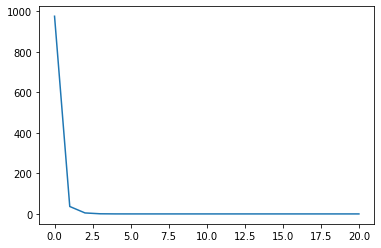

In [26]:
plt.plot(cost)
plt.show()

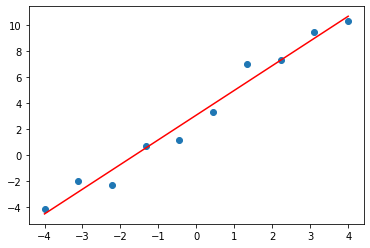

In [27]:
plt.scatter(data_x, data_y)
model_y = model_a * data_x + model_b
plt.plot(data_x, model_y, color = "red")
plt.show()

### 2. Multiple Linear Regression
The notion of linear regression can very easily be generalized to more than one variable. Let's inspect a popular dataset.

In [28]:
housing = load_boston()
print(housing.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
housing_df = pd.DataFrame(data = housing.data, columns = housing.feature_names)
housing_df["Price"] = housing.target
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


All variables except the last one are called **explanatory variables**. The price of the house is our **target variable**.

We propose the hypothesis that the price is a linear function of all other predictors, that is:

$$ \text{Price} = \beta_0 + \beta_1 \text{CRIM} + \beta_2 \text{ZN} + \beta_3 \text{INDUS} + \dots + \beta_{13}\text{LSTAT}  $$
This is the same as $y = ax + b$, except $x$ is now a vector, not a single number.

How can we attack the problem? We know that the variables are independent, so we can perform many linear regressions:

$$ \text{Price} = \text{Price}_{CRIM} + \text{Price}_{ZN} + \dots + \text{Price}_{LSTAT} $$

All these operations can be vectorized. This means that if we take $x$ and $b$ to be vectors, and $A$ to be a matrix, we can perform all those calculations easily and computationally fast.

Of course, we won't bother doing this right now. Feel free to implement this as an exercise.

Instead, we'll use a ready model.

In [30]:
regression = LinearRegression()
explanatory_variables = housing_df.drop("Price", axis = 1)
regression.fit(explanatory_variables, housing_df.Price)

for coefficient in zip(explanatory_variables.columns, regression.coef_):
    print(coefficient)
print("Free term:", regression.intercept_)

('CRIM', -0.108011357836794)
('ZN', 0.0464204583668798)
('INDUS', 0.02055862636707578)
('CHAS', 2.686733819344918)
('NOX', -17.76661122830019)
('RM', 3.8098652068092203)
('AGE', 0.0006922246403387499)
('DIS', -1.4755668456002553)
('RAD', 0.3060494789851638)
('TAX', -0.01233459391657376)
('PTRATIO', -0.952747231707289)
('B', 0.009311683273793493)
('LSTAT', -0.5247583778554917)
Free term: 36.45948838509024


There are many questions left. How good is the model? How well can it predict data? Are all variables necessary? Are there better models? We'll leave those unanswered for now. Feel free to explore them but beware: things can get hairy :).

**Note**: Usually when we work with data, we want to know more about it before applying any kind of model. This includes cleaning the data and exploring it. In this case we didn't do this only because we wanted to accentuate on the multiple linear regression steps. **In any real situation** when we're presented with an unknown dataset, we have to get acquainted with the data before doing anything else.